In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

# Data Exploration

In [2]:
df = pd.read_csv('train.csv',index_col=0) # units are Kgs/month

In [3]:
df.head()

,month,year,latitude,longitude,co2
384,0,2000,35.1,-114.5,24.550266
421,0,2000,33.3,-112.8,4.388263
426,0,2000,39.5,-112.5,13.314685
466,0,2000,36.9,-111.3,16.433954
470,0,2000,39.1,-111.1,10.039619


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36276 entries, 384 to 3957963
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      36276 non-null  int64  
 1   year       36276 non-null  int64  
 2   latitude   36276 non-null  float64
 3   longitude  36276 non-null  float64
 4   co2        36276 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.7 MB


In [5]:
df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [6]:
df.month.unique() # going form 0-11 instead of 1-12

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [7]:
# Adding day column for date
df['day'] = 1

# Adding 1 to month to make sure it is ranging from 1-12
df['month'] = df['month']+ 1

df['date'] = pd.to_datetime(df[['year','month','day']])

In [8]:
# Combining latlong to make it easier to groupby the latlong pairs
df['lat_long'] = list(zip(df.latitude, df.longitude))

In [9]:
# Pivoting the df based on lat long for simplicity
df_pivot = df.pivot(index='date', columns = 'lat_long', values='co2')

In [10]:
df_pivot.head()

lat_long,"(25.799999999993418, -97.80000000000469)","(26.59999999999337, -81.70000000000559)","(26.99999999999335, -80.50000000000566)","(27.599999999993315, -82.30000000000555)","(27.69999999999331, -82.40000000000555)","(27.89999999999329, -82.40000000000555)","(28.299999999993275, -100.8000000000045)","(28.39999999999327, -81.10000000000562)","(28.799999999993247, -81.30000000000561)","(28.99999999999324, -110.90000000000391)",...,"(45.79999999999228, -106.60000000000416)","(46.99999999999221, -101.20000000000448)","(47.1999999999922, -101.30000000000447)","(47.1999999999922, -93.60000000000493)","(47.2999999999922, -101.80000000000445)","(47.2999999999922, -101.10000000000448)","(47.89999999999216, -65.90000000000649)","(48.9999999999921, -105.40000000000424)","(48.9999999999921, -103.00000000000438)","(48.9999999999921, -102.8000000000044)"
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.024838,4.076302,8.681103,4.254332,8.166128,2.724895,4.902469,5.893239,5.733449,2.431313,...,18.777016,6.443851,5.556982,7.820921,7.988350,11.437829,6.611117,11.044418,16.489307,5.585770
2000-02-01,3.857137,3.475400,7.401391,3.627186,6.962330,2.323208,4.698199,5.024495,4.888261,2.330008,...,16.009029,5.493940,4.737808,6.668012,6.810759,9.751738,6.611117,10.237016,15.283857,5.177423
2000-03-01,3.521733,3.406172,7.253960,3.554935,6.823645,2.276932,4.289660,4.924411,4.790890,2.127399,...,15.690140,5.384504,4.643434,6.535189,6.675093,9.557490,6.611117,10.233405,15.278464,5.175596
2000-04-01,3.354032,3.071030,6.540224,3.205155,6.152249,2.052898,4.085391,4.439885,4.319502,2.026094,...,14.146346,4.854709,4.186555,5.892175,6.018313,8.617104,6.611117,8.750677,13.064754,4.425699
2000-05-01,3.018629,3.443486,7.333427,3.593878,6.898398,2.301875,3.676852,4.978357,4.843374,1.823485,...,15.862024,5.443491,4.694303,6.606781,6.748218,9.662191,6.611117,8.377229,12.507195,4.236826


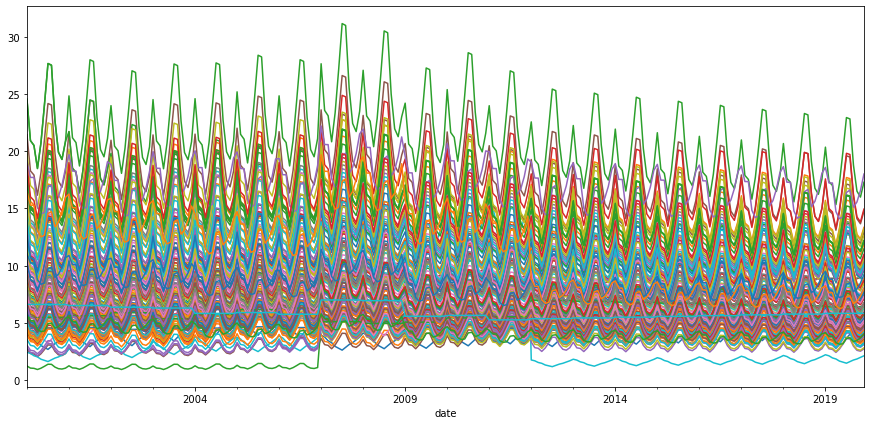

In [11]:
df_pivot.plot(figsize = (15,7), legend = False)

- There are 153 unique lat-long pairs in this monthly emissions dataset
- The data seems to be seasonal and non-stationary
- We can plot one of the latlong location for better understanding the data

# Sample Data EDA

In [12]:
# Picking the max latlong as a sample
df_pivot.sum().idxmax()

(38.89999999999267, -82.10000000000556)

In [13]:
df_sample = df_pivot[(38.89999999999267, -82.10000000000556)].dropna()

In [14]:
df_sample = pd.DataFrame(df_sample).droplevel(0, axis = 1)
df_sample.columns = ['co2']

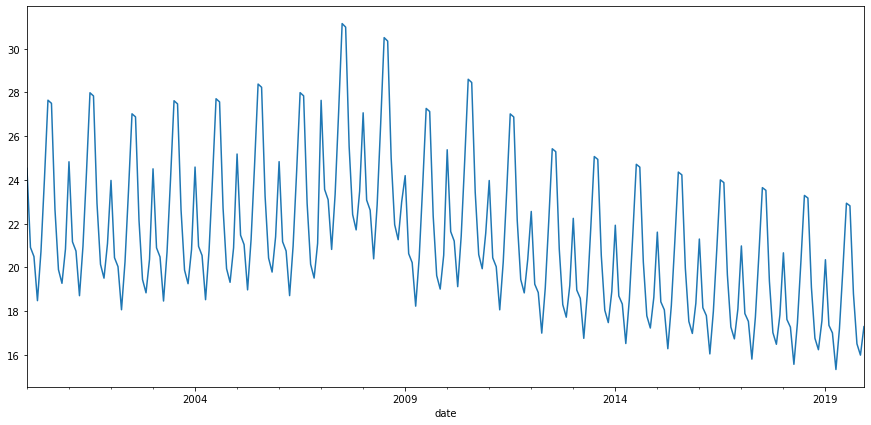

In [15]:
df_sample.plot(figsize = (15,7), legend = False)

In [16]:
# In order to use an ARIMA model, the data needs to be stationary. The stationarity of the dataset can be tested using ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Time series is probably stationary")
    else:
        print("Time series is probably non-stationary")

In [17]:
adf_test(df_sample) # High p-value indicative of non stationary data

ADF Test Statistic : -1.004589338718683
p-value : 0.7515867670940478
#Lags Used : 12
Number of Observations Used : 227
Time series is probably non-stationary


### Data can be made stationary using techniques like log transformation, differencing etc.

In [18]:
df_diff = df_sample.diff().dropna()

adf_test(df_diff) # Data can be made stationary by first order differencing as seen from the p-value

ADF Test Statistic : -3.5818439568082487
p-value : 0.0061177709436888925
#Lags Used : 11
Number of Observations Used : 227
Time series is probably stationary


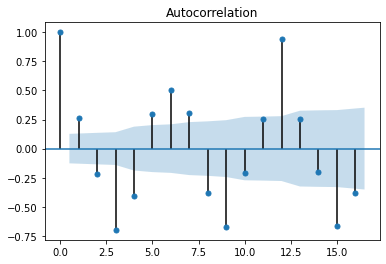

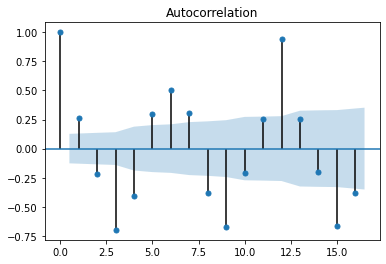

In [19]:
# The parameters (p,d,q) required for typical ARIMA modelling can be obtained from pcf and acf curves
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diff, lags = 16)

**But considering the nature of the dataset with several sets of time series data, using an Auto ARIMA module wil be better**

In [20]:
from pmdarima import auto_arima

In [21]:
stepwise_fit = auto_arima(df_sample, 
                          seasonal = True, 
                          m = 12,  
                          error_action = "ignore", 
                          n_fits = 100, 
                          stepwise = True,
                          suppress_warnings=True)           

In [22]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -111.540
Date:                            Sun, 08 May 2022   AIC                            239.080
Time:                                    18:22:35   BIC                            266.891
Sample:                                         0   HQIC                           250.287
                                            - 240                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9933      0.088     11.314      0.000       0.821       1.165
ar.L2         -0.9554      0.057    -16.802      0.000      -1.067      -0.844
ma.L1         -1.0528      0.115     -9.148      0.000      -1.278      -0.827
ma.L2          0.9191      0.104      8.830      0.000       0.715       1.123
ar.S.L12       0.9978      0.002    645.190      0.000       0.995       1.001
ma.S.L12      -0.9081      0.060    -15.025      0.000      -1.027      -0.790
ma.S.L24       0.2248      0.046      4.892      0.000       0.135       0.315
sigma2         0.1206      0.003     42.191      0.000       0.115       0.126
===================================================================================
Ljung-Box (Q):                       39.97   Jarque-Bera (JB):             32284.27
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from pmdarima.model_selection import train_test_split
train, test = train_test_split(df_sample, test_size =0.20)

In [24]:
test["predicted_co2"] = stepwise_fit.predict(n_periods = test.shape[0])

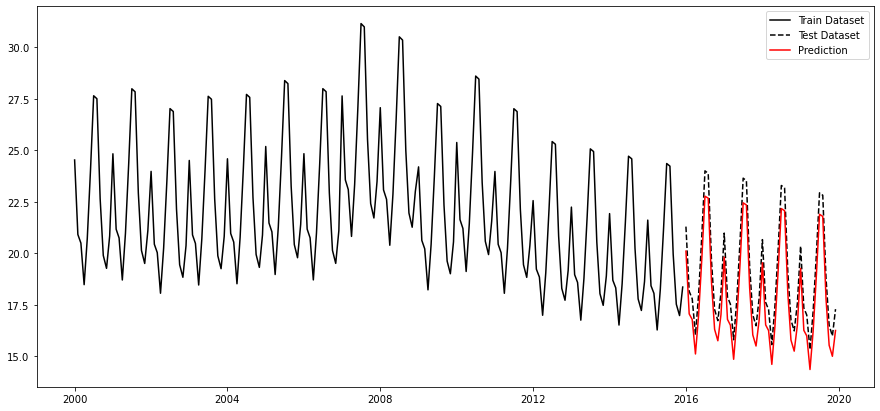

In [25]:
plt.figure(figsize = (15,7))
plt.plot(train, label = "Train Dataset", c = 'k')
plt.plot(test.co2, label = "Test Dataset", c = 'k', ls = '--')
plt.plot(test.predicted_co2, label = "Prediction", c= 'r')
plt.legend()

In [26]:
from statsmodels.tools.eval_measures import rmse

rmse(test.co2,test.predicted_co2)

1.0494772332184248

# Fitting the models on entire dataset and predicting into future
## This code block is computationally expensive and can take longer than 40 mins

In [27]:
# Creating a future dataset to predict
from pandas.tseries.offsets import DateOffset
future_dates = [df_pivot.index[-1] + DateOffset(months = x) for x in range(0,13)]

future_date_df = pd.DataFrame(index = future_dates[1:],columns = df_pivot.columns)

In [28]:
future_date_df

lat_long,"(25.799999999993418, -97.80000000000469)","(26.59999999999337, -81.70000000000559)","(26.99999999999335, -80.50000000000566)","(27.599999999993315, -82.30000000000555)","(27.69999999999331, -82.40000000000555)","(27.89999999999329, -82.40000000000555)","(28.299999999993275, -100.8000000000045)","(28.39999999999327, -81.10000000000562)","(28.799999999993247, -81.30000000000561)","(28.99999999999324, -110.90000000000391)",...,"(45.79999999999228, -106.60000000000416)","(46.99999999999221, -101.20000000000448)","(47.1999999999922, -101.30000000000447)","(47.1999999999922, -93.60000000000493)","(47.2999999999922, -101.80000000000445)","(47.2999999999922, -101.10000000000448)","(47.89999999999216, -65.90000000000649)","(48.9999999999921, -105.40000000000424)","(48.9999999999921, -103.00000000000438)","(48.9999999999921, -102.8000000000044)"
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
for column in df_pivot.columns:
    df1 = df_pivot[column].dropna()
    
    stepwise_fit = auto_arima(df1, 
                              seasonal = True, 
                              m = 12, 
                              error_action = "ignore", 
                              n_fits = 100, 
                              stepwise = True,
                              suppress_warnings=True, 
                              n_jobs= -1)
    
    future_date_df[column] = stepwise_fit.predict(n_periods = future_date_df.shape[0])

# Creating a submission file

In [87]:
df_melt = pd.melt(future_date_df.reset_index(), id_vars='index').rename(columns={'index':'date','value':'co2_predicted'})

In [88]:
df_melt['month'] = df_melt['date'].dt.month-1
df_melt['year'] = df_melt['date'].dt.year
df_melt[['latitude', 'longitude']] = pd.DataFrame(df_melt['lat_long'].tolist(), index=df_melt.index)
df_melt.drop(['lat_long','date'],axis = 1,inplace = True)

# rounding off the numbers to avoid trailing decimals and make it easier to merge
df_melt['latitude'] = round(df_melt['latitude'],2)
df_melt['longitude'] = round(df_melt['longitude'],2)

In [89]:
# Importing the test df to predict for
test = pd.read_csv('test.csv',index_col=0)
test.head()

,month,year,latitude,longitude
3970411,0,2020,33.3,-112.8
3970420,0,2020,39.5,-112.5
3970467,0,2020,36.9,-111.3
3970473,0,2020,39.1,-111.1
3970475,0,2020,39.3,-111.0


In [90]:
# Preparing file for submission to Xeek.ai
submission = pd.merge(test, df_melt, on =['month','year','latitude','longitude'])

#for Submissions to the Xeek Prediction leaderboard, only co2 is needed with no index
submission['co2_predicted'].to_csv('sample_submission.csv', index=False)